In [1]:
from planet4 import region_data, io, helper_functions

# per region

In [2]:
def process_region(args):
    from planet4 import region_data, io, helper_functions
    regionclass, season = args
    try:
        imagenames = getattr(regionclass, season)
    except AttributeError:
        return "No {} data for region {} in PlanetFour.".format(season, regionclass)
    print(imagenames)
    df = io.get_list_of_image_names(imagenames)
    return "Status for {}, {}: {}".format(regionclass,
                                          season,
                                          helper_functions.get_status_per_classifications(df))

In [14]:
processlist = []
for season in ['season'+str(i) for i in range(1,5)]:
    for region in [region_data.Manhattan]:
        processlist.append((region, season))

In [15]:
from IPython.parallel import Client
c = Client()
lbview = c.load_balanced_view()

In [16]:
import sys
for region in region_data.regions:
    print(region)
    sys.stdout.flush()
    processlist = []
    for season in ['season'+str(i) for i in range(1,5)]:
        processlist.append((region, season))
    res = lbview.map_async(process_region, processlist)
    for result in res.result:
        print(result)

<class 'planet4.region_data.Giza'>
Status for <class 'planet4.region_data.Giza'>, season1: 10.1
Status for <class 'planet4.region_data.Giza'>, season2: 143.9
Status for <class 'planet4.region_data.Giza'>, season3: 139.8
Status for <class 'planet4.region_data.Giza'>, season4: nan
<class 'planet4.region_data.Inca'>
Status for <class 'planet4.region_data.Inca'>, season1: 30.7
Status for <class 'planet4.region_data.Inca'>, season2: 146.9
Status for <class 'planet4.region_data.Inca'>, season3: 134.5
Status for <class 'planet4.region_data.Inca'>, season4: 33.7
<class 'planet4.region_data.Ithaca'>
Status for <class 'planet4.region_data.Ithaca'>, season1: 24.4
Status for <class 'planet4.region_data.Ithaca'>, season2: 144.6
Status for <class 'planet4.region_data.Ithaca'>, season3: 139.5
No season4 data for region <class 'planet4.region_data.Ithaca'> in PlanetFour.
<class 'planet4.region_data.Manhattan'>
Status for <class 'planet4.region_data.Manhattan'>, season1: 17.1
No season2 data for region

# per image_name (= hirise obs_id)

In [8]:
from planet4 import io
import pickle

In [10]:
# image_names = io.get_all_image_names()
# image_names = image_names.image_name.unique()
# with open('current_image_names.pkl', 'wb') as f:
#     pickle.dump(image_names, f)

In [11]:
with open('current_image_names.pkl', 'rb') as f:
    image_names = pickle.load(f)

In [12]:
from planet4 import helper_functions as hf

In [13]:
def process_image_name(image_name):
    from planet4 import helper_functions as hf
    from planet4 import io
    df = io.get_image_name_data(image_name)
    status = hf.get_status_per_classifications(df)
    return image_name, status

In [14]:
from IPython.parallel import Client
c = Client()
lbview = c.load_balanced_view()

In [17]:
results = lbview.map_async(process_image_name, image_names)

In [18]:
for result in results:
    print(result)

('ESP_011544_0985', 283.19999999999999)
('ESP_021684_0985', 289.19999999999999)
('ESP_011697_0980', 268.19999999999999)
('ESP_020322_0930', 246.59999999999999)
('ESP_021455_0935', 263.69999999999999)
('ESP_020214_0935', 294.5)
('ESP_012008_0975', 274.39999999999998)
('ESP_020930_0980', 284.0)
('ESP_020357_0950', 280.0)
('ESP_012884_0935', 279.39999999999998)
('ESP_021497_0980', 279.10000000000002)
('ESP_011900_0985', 294.5)
('ESP_012291_0980', 295.19999999999999)
('ESP_021494_0945', 293.0)
('ESP_021454_0925', 273.80000000000001)
('ESP_021522_0930', 286.80000000000001)
('ESP_020339_0985', 283.30000000000001)
('ESP_012604_0965', 287.80000000000001)
('ESP_012254_1065', 271.19999999999999)
('ESP_021605_0985', 291.0)
('ESP_011350_0945', 303.30000000000001)
('ESP_020376_0980', 283.10000000000002)
('ESP_021526_0985', 283.0)
('ESP_021460_0985', 291.5)
('ESP_012076_0945', 278.60000000000002)
('ESP_012344_0950', 281.60000000000002)
('ESP_011729_0985', 318.39999999999998)
('ESP_012063_0945', 263.

In [28]:
df = pd.DataFrame(results.result, columns=['image_name', 'status'])
df = df.set_index('image_name')
df

,status
image_name,
ESP_011544_0985,283.2
ESP_021684_0985,289.2
ESP_011697_0980,268.2
ESP_020322_0930,246.6
ESP_021455_0935,263.7
ESP_020214_0935,294.5
ESP_012008_0975,274.4
ESP_020930_0980,284.0
ESP_020357_0950,280.0


In [30]:
%matplotlib nbagg

In [42]:
df = df.drop('tutorial')

<IPython.core.display.Javascript object>


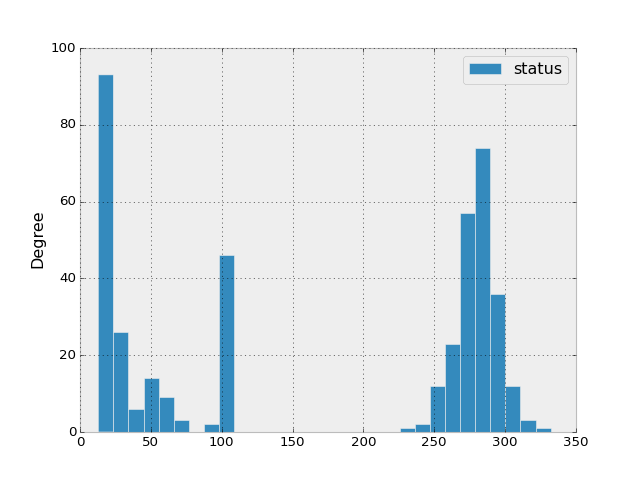

In [44]:
df.plot(kind='hist',bins=30)

In [19]:
df = pd.read_hdf('image_name_status.h5','df')

In [20]:
df.head()

,status
image_name,
ESP_011544_0985,283.2
ESP_021684_0985,289.2
ESP_011697_0980,268.2
ESP_020322_0930,246.6
ESP_021455_0935,263.7
